# Time domain analysis of NR injection of an Eccentric,Precessing waveform and recovery with non-eccentric waveform


## Procedure

1. Compute the Covariance matrix for 16s of data
1. Inject a precessing waveform with ~24 SNR
1. Recover with SEOBNRv4PHM


In [1]:
import warnings

warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")

import numpy as np

import gwpy

print(gwpy.__version__)

import matplotlib.pyplot as plt
import config

config.conf_matplolib()

3.0.8


In [2]:
%%bash
hostname

sonic13


In [3]:
from gwosc.datasets import event_gps

gps0 = event_gps("GW150914") + 10
# gps1 = event_gps('GW190412')
print(gps0)

1126259472.4


In [4]:
sf = 4096

In [5]:
ans_dur = 0.02

# Load the noise data

In [6]:
from gwpy.timeseries import TimeSeries

# ldata0 = TimeSeries.fetch_open_data('L1', *segment0, verbose=True)

# data_file_name = "Entire_noise_ts_gpsT1126259462_R200_D8_S4096_A1.txt"
data_file_name = "Entire_noise_ts_gpsT1126259472_R128_D4_S4096_A0.02_N1000.txt"

req_duration = 30

ldata0f = TimeSeries.read(data_file_name)[: req_duration * sf]

In [7]:
N0 = len(ldata0f)
# N1 = len(ldata1)

N0  # , N1

122880

In [8]:
N0 / 4096

30.0

In [9]:
# ldata1.write("GW150914_af_16s.txt")

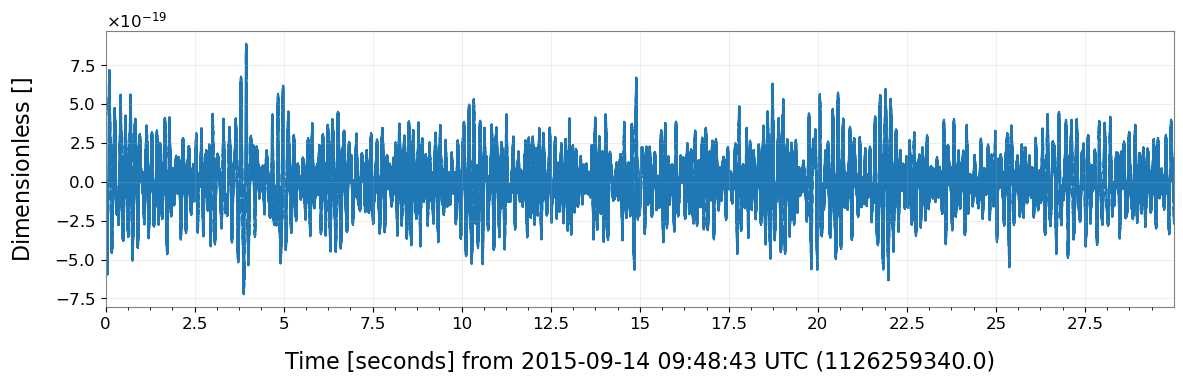

In [10]:
plot0 = ldata0f.plot()

In [11]:
np.mean(ldata0f)

<Quantity -4.63037906e-23>

In [12]:
ldata0f.times[-1] - ldata0f.times[0]

<Quantity 29.99975586 s>

# Prepare the noise covariance

In [13]:
# Cij_file_name = "Cij_gpsT1126259462_R200_D8_S4096_A1.npy"
Cij_file_name = f"Cij_gpsT1126259472_R128_D4_S4096_A0.02_N1000.npy"

In [14]:
Cij = np.load(Cij_file_name)

In [15]:
Cij.shape

(81, 81)

In [16]:
np.linalg.det(Cij)

0.0

In [17]:
Lij = np.linalg.cholesky(Cij)

In [18]:
Lij

array([[2.32247876e-19, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.30455064e-19, 2.88017270e-20, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.26901195e-19, 4.27811051e-20, 2.49940124e-20, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.42716480e-19, 6.80463983e-21, 1.92106639e-20, ...,
        3.57972058e-21, 0.00000000e+00, 0.00000000e+00],
       [1.43032184e-19, 6.35754584e-21, 1.43860299e-20, ...,
        3.79895876e-21, 3.57829581e-21, 0.00000000e+00],
       [1.42043345e-19, 1.68154124e-20, 7.85839636e-21, ...,
        3.21594117e-21, 3.79892385e-21, 3.57791271e-21]])

In [19]:
inv_Lij = np.linalg.inv(Lij)

In [21]:
inv_Cij = np.linalg.inv(Cij)

In [19]:
np.save(f"inj{Cij_file_name}", inv_Cij)

In [16]:
inv_Cij = np.load(f"inj{Cij_file_name}")

In [45]:
inv_Cij @ Cij

array([[ 1.00000000e+00, -2.06362579e-13, -5.33462407e-13, ...,
         2.64251568e-11,  2.59874371e-11,  2.83680876e-11],
       [ 7.69229926e-11,  1.00000000e+00,  7.47588940e-11, ...,
         4.25431493e-11,  4.27627483e-11,  3.58207181e-11],
       [-2.31152077e-10, -2.28300613e-10,  1.00000000e+00, ...,
        -2.14973524e-10, -2.13604918e-10, -2.05746101e-10],
       ...,
       [ 1.17015026e-13, -7.21089984e-13,  3.50142201e-13, ...,
         1.00000000e+00, -2.23477593e-12,  2.42200000e-14],
       [-1.22140678e-13, -2.89554951e-13, -4.33305691e-13, ...,
         2.23893255e-12,  1.00000000e+00, -1.00985292e-12],
       [ 8.22405528e-13,  3.91997224e-13,  9.85976572e-13, ...,
         5.24760552e-13,  1.85707139e-12,  1.00000000e+00]])

In [23]:
Lij @ inv_Lij

array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 7.06362905e-16,  1.00000000e+00,  1.09544348e-15, ...,
         1.91687629e-16, -1.97448622e-16,  0.00000000e+00],
       [-2.41405111e-15, -2.34007211e-15,  1.00000000e+00, ...,
         1.04894714e-17, -3.02259503e-17,  0.00000000e+00],
       ...,
       [-5.07398040e-16, -2.52985683e-15, -1.64351453e-15, ...,
         1.00000000e+00, -5.73199630e-17,  0.00000000e+00],
       [-1.85763179e-15, -2.71814348e-16, -2.78210718e-15, ...,
        -3.46532574e-17,  1.00000000e+00,  0.00000000e+00],
       [-8.10703325e-16,  2.74988718e-15, -3.18506410e-15, ...,
        -7.26649850e-16,  1.11758579e-16,  1.00000000e+00]])

# Inject a signal in the noise

In [20]:
from waveformtools.waveforms import modes_array

/mnt/pfs/vaishak.p/Projects/Codes/custom_libraries/waveformtools/waveformtools


In [21]:
path_to_waveform = "/mnt/pfs/vaishak.p/Projects/Codes/waveforms/eccprecrun4b_waveforms_Lev3/extrapolated/rhOverM_Extrapolated_N3_CoM.h5"
data_dir = "/mnt/pfs/vaishak.p/Projects/Codes/waveforms/eccprecrun4b_waveforms_Lev3/extrapolated"
file_name = "rhOverM_Extrapolated_N3_CoM.h5"

In [22]:
wfm = modes_array(label="eccprecrun4b", file_name=file_name, data_dir=data_dir)

In [23]:
wfm.load_modes(ftype="SpEC")

Loading SpEC data.


In [24]:
from waveformtools.waveformtools import (
    get_starting_angular_frequency,
    get_waveform_angular_frequency,
)

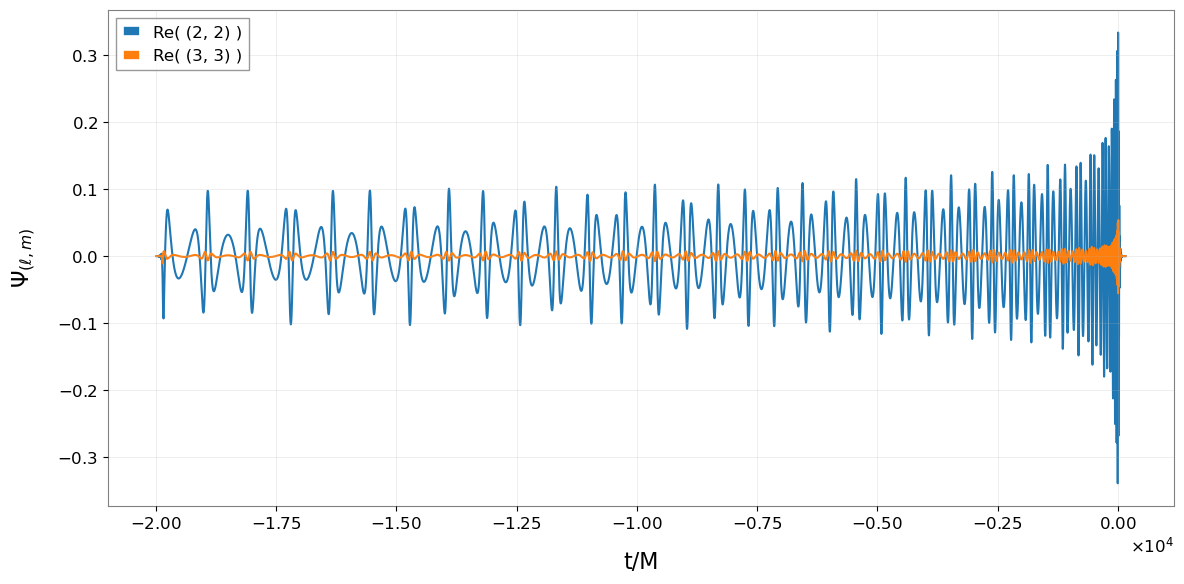

In [25]:
wfm.plot_modes()

In [26]:
wfm.data_len

389833

In [27]:
h22 = wfm.mode(2, 2)

In [28]:
omega22 = get_waveform_angular_frequency(h22, wfm.delta_t())

In [29]:
config.conf_matplolib()

(0.0, 0.04)

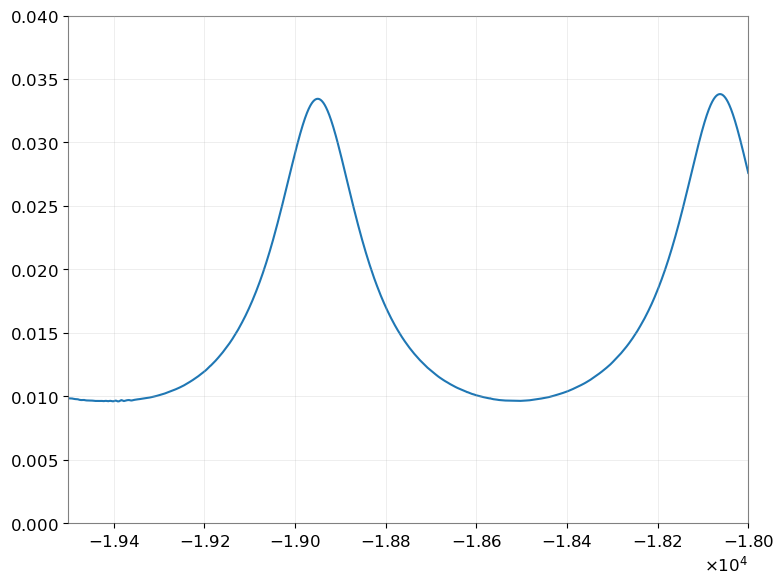

In [250]:
start = 2500
end = 5800
plt.plot(wfm.time_axis, -omega22)
plt.xlim(-19500, -18000)
plt.ylim(0, 0.04)

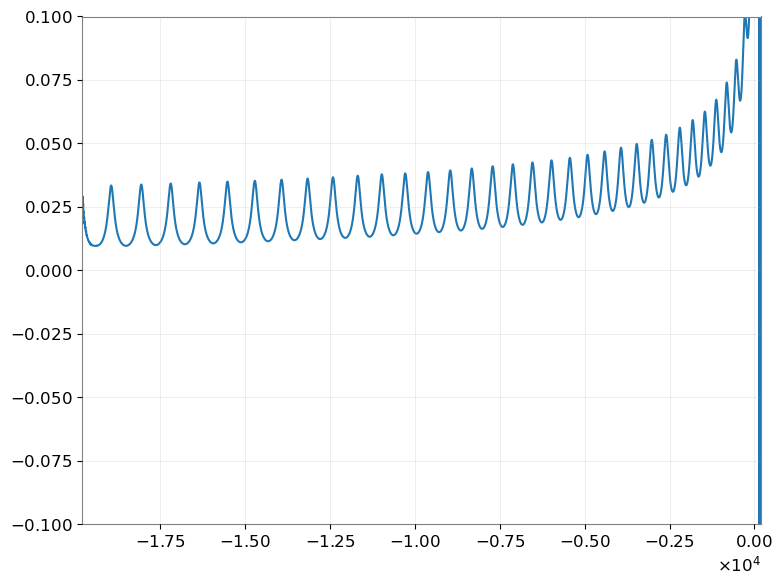

In [181]:
plt.plot(wfm.time_axis, -omega22)
plt.xlim(-19800, 200)
plt.ylim(-0.1, 0.1)
plt.show()

In [31]:
0.024

0.024

In [251]:
# omega_st = 2*0.025/Tc
omega_st = 2 * 0.00429 / Tc

print("Starting 1Msun angular frequency ", omega_st)

f0 = omega_st / (2 * np.pi)

print("Starting frequency ", f0)

Massigned = 30 / f0

print("Assigned mass is ", Massigned)

Starting 1Msun angular frequency  27.933283415618416
Starting frequency  4.445720132382533
Assigned mass is  6.748063104890617


In [186]:
wfm.delta_t()

0.05167833379164222

In [187]:
time_axis = np.array(ldata0f.times)

In [188]:
Msun = 2 * 1e30
G = 6.6743 * 1e-11
c = 2.99792458 * 1e8
Mevent = 62

Tc = G * Msun * Mevent / (c**3)

In [189]:
Tc

0.0003071604534396641

# Signal model

In [256]:
from pycbc.waveform import td_approximants
from pycbc.waveform import get_td_waveform

# approximant='SEOBNRv4PHM'
approximant = "IMRPhenomXPHM"

In [257]:
help(get_td_waveform)

modes_select = [(2, 2), (3, 3)]

Help on function get_td_waveform in module pycbc.waveform.waveform:

get_td_waveform(template=None, **kwargs)
    Return the plus and cross polarizations of a time domain waveform.
    
    Parameters
    ----------
    template: object
        An object that has attached properties. This can be used to subsitute
        for keyword arguments. A common example would be a row in an xml table.
    mass1 : {None, float}
        The mass of the first component object in the binary (in solar masses).
    mass2 : {None, float}
        The mass of the second component object in the binary (in solar masses).
    spin1x : {0.0, float}
        The x component of the first binary component's dimensionless spin.
    spin1y : {0.0, float}
        The y component of the first binary component's dimensionless spin.
    spin1z : {0.0, float}
        The z component of the first binary component's dimensionless spin.
    spin2x : {0.0, float}
        The x component of the second binary component's dim

In [258]:
def signal_generator(x):

    mass1, mass2, spin1x, spin1y, spin1z, spin2x, spin2y, spin2z = x

    hp, hc = get_td_waveform(
        approximant=approximant,
        mass1=mass1,
        mass2=mass2,
        spin1x=spin1x,
        spin1y=spin1y,
        spin1z=spin1z,
        spin2x=spin2x,
        spin2y=spin2y,
        spin2z=spin2z,
        delta_t=1 / sf,
        mode_array=modes_select,
        f_lower=20,
    )

    return hp + 1j * hc


def get_damped_sinusoid(time_axis, x):

    A, omega, gamma, t, phi = x
    return A * np.cos(omega * (time_axis - t) + phi) * np.exp(-gamma * (time_axis - t))

In [259]:
# Massigned=25

In [260]:
q = 2
mass1 = Massigned * q / (1 + q)
mass2 = Massigned * 1 / (1 + q)
spin1z = 0.2
spin2z = 0.2

spin1x = 0.08876
spin1y = 0.10947

spin2y = 0.10947
spin2x = 0.08876

params = [mass1, mass2, spin1x, spin1y, spin1z, spin2x, spin2y, spin2z]
# params = [mass1, mass2, 0, 0, spin1z, 0, 0, spin2z]

In [261]:
mass1, mass2

(4.498708736593745, 2.2493543682968724)

In [262]:
h22_gen = signal_generator(params)

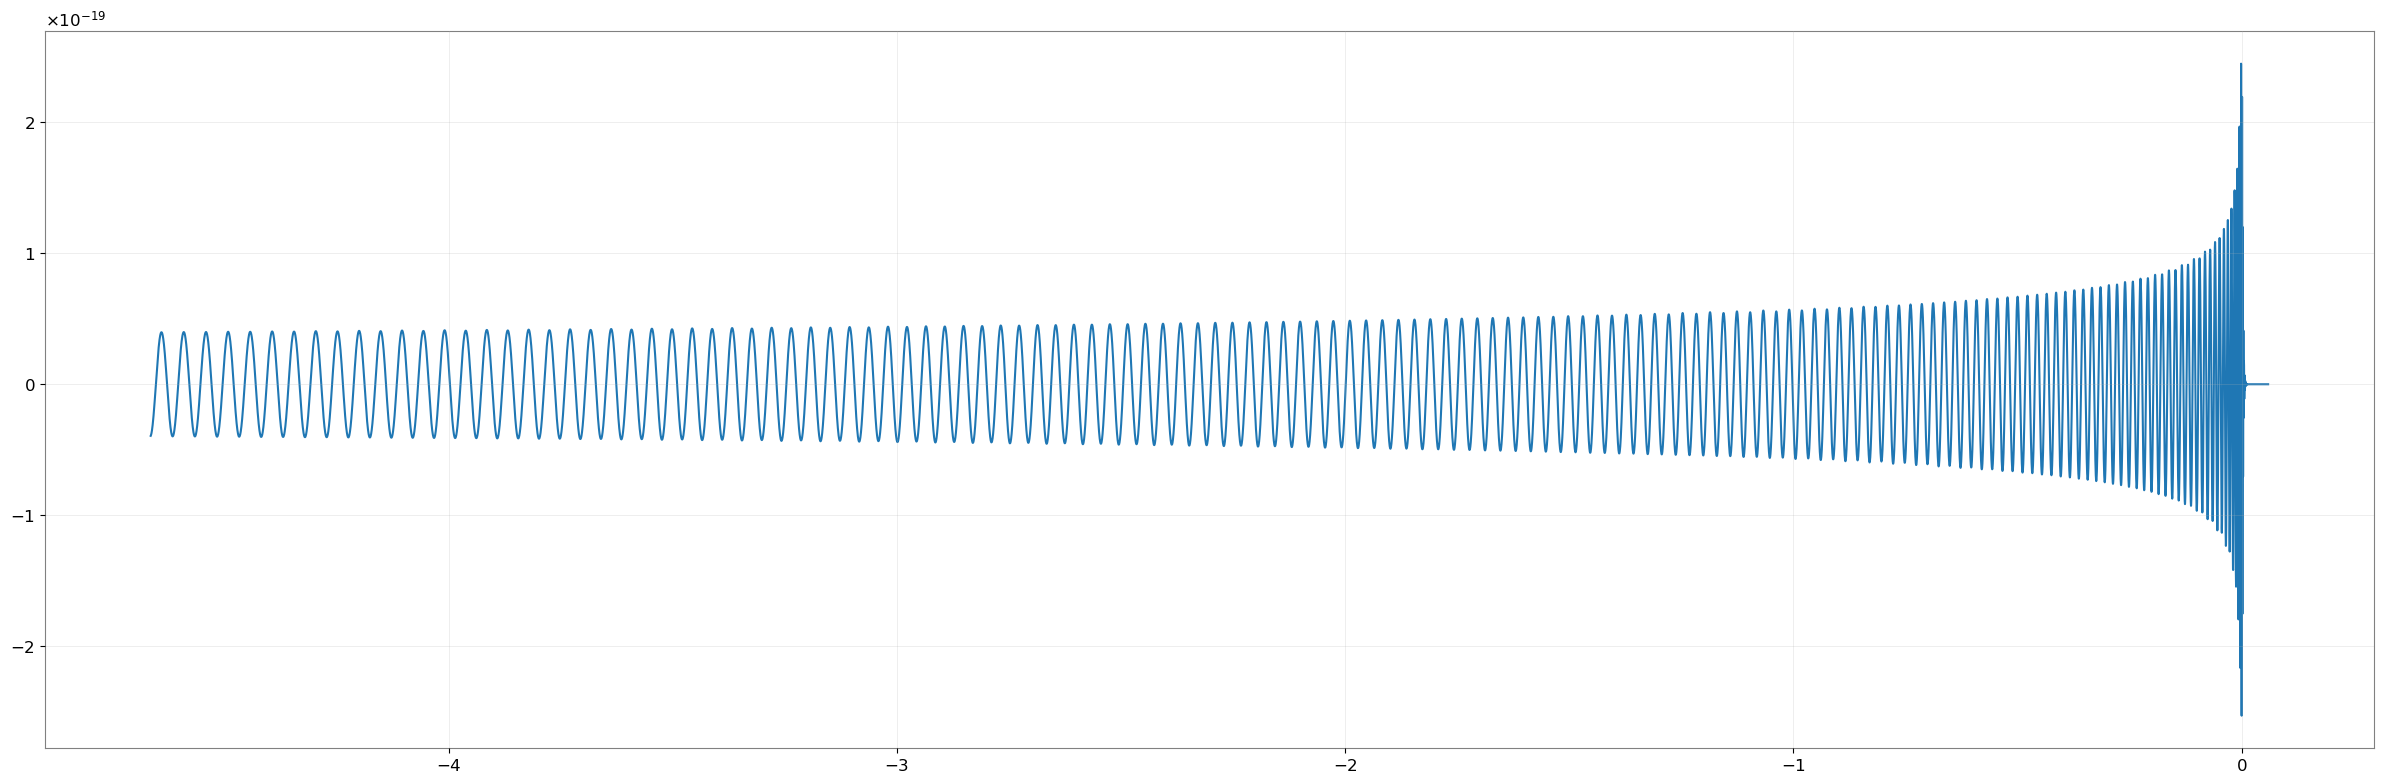

In [205]:
fig, ax = plt.subplots(figsize=(24, 8))

ax.plot(h22_gen.sample_times, h22_gen)
# ax.set_xlim(-20,0)
plt.show()

In [34]:
time_axis[40]

1126259340.0097656

In [35]:
full_data = ldata0f

In [36]:
len(time_axis)

122880

# Data conditioning

In [38]:
def whiten(x):

    return np.dot(inv_Lij, x)


def inner_product(x, y):

    xbar = whiten(x)
    ybar = whiten(y)

    return np.dot(xbar, ybar)

# Inject NR signal

In [264]:
sg = wfm.to_td_waveform(2, np.pi / 2, 0, distance=220, delta_t=1 / sf)

In [266]:
len(sg)

3

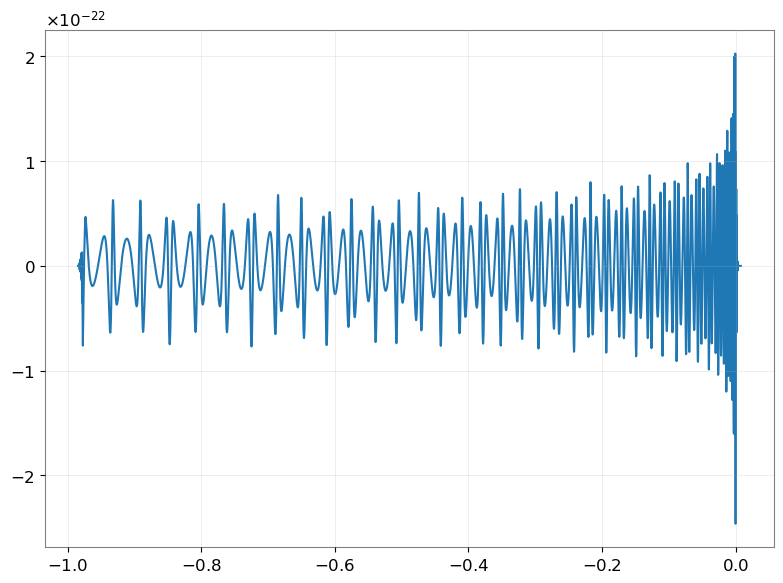

In [267]:
plt.plot(sg[0], sg[1])
plt.show()

In [268]:
def generate_nr_injection(wfm, params):

    Mtotal, D, theta, phi = params

    signal = wfm.td_waveform(
        Mtotal=Mtotal, theta=theta, phi=phi, distance=D, delta_t=1 / sf
    )

    return signal


def nr_injection(time):

    hp = np.interp(time, signal_t, signal_hp)
    hc = np.interp(time, signal_t, signal_hx)

    return {"plus": hp, "cross": hx}

In [270]:
import bilby

In [271]:
waveform = bilby.gw.waveform_generator.WaveformGenerator(
    duration=1,
    sampling_frequency=sf,
    time_domain_source_model=nr_injection,
    start_time=-1,
)

12:07 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: None
  time_domain_source_model: __main__.nr_injection
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters


In [272]:
ifos = bilby.gw.detector.InterferometerList(["H1"])

In [281]:
ifos.set_strain_data_from_power_spectral_densities(
    sampling_frequency=sf, duration=46, start_time=-1
)

In [282]:
injection_parameters = dict(
    mass_1=mass1,
    mass_2=mass2,
    a_1=0.4,
    a_2=0.3,
    tilt_1=0.5,
    tilt_2=1.0,
    phi_12=1.7,
    phi_jl=0.3,
    luminosity_distance=2000.0,
    theta_jn=0.4,
    psi=2.659,
    phase=1.3,
    geocent_time=1126259642.413,
    ra=1.375,
    dec=-1.2108,
)

In [283]:
# A0 = 3e-19

# mass1 = 32
# mass2 = 50
# spin1x = spin1y = spin1z = spin2x = spin2y = spin2z = 0


# inj_params = [mass1, mass2, spin1x, spin1y, spin1z, spin2x, spin2y, spin2z]

# signal = A0 * h22.real #wfm.to_td_waveform(Mtotal=Massigned, theta=np.pi/3, )

# time_axis_0 = time_axis[req_duration*sf:(req_duration+1)*sf]

# signal = signal_generator(inj_params).real
inj_params = [Massigned, 220, np.pi / 8, 0]

signa_t, signal_hp, signal_hc = sg  # nr_injection(wfm, inj_params)

In [284]:
ifos.inject_signal(
    injection_polarizations={"plus": signal_hp, "cross": signal_hc},
    parameters=injection_parameters,
)

12:20 bilby WARNING : Injecting signal outside segment, start_time=-1, merger time=1126259642.413.


ValueError: operands could not be broadcast together with shapes (4065,) (94209,) 

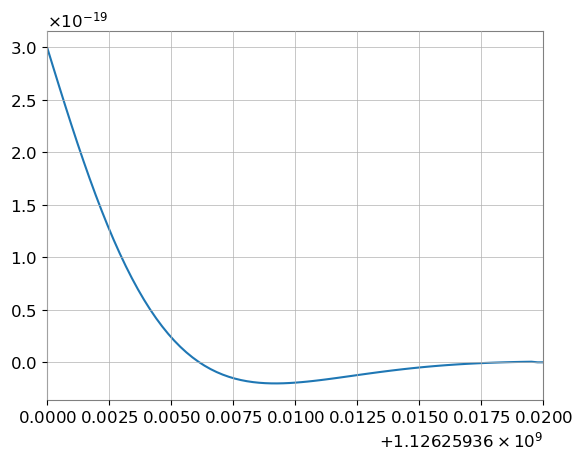

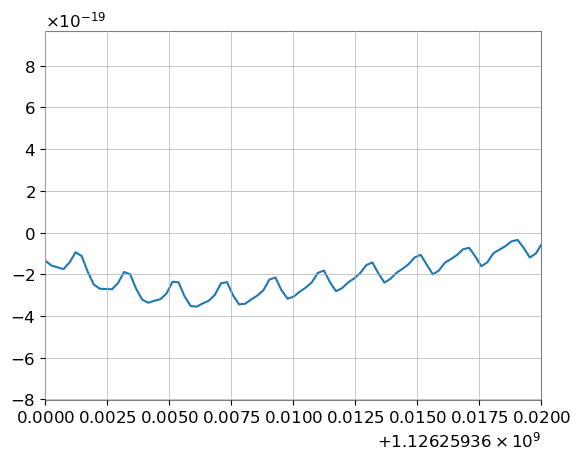

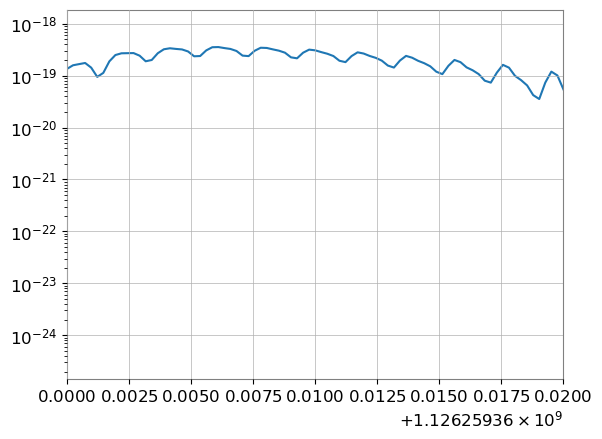

Matched filter SNR 14.581423859663085


In [132]:
A


analysis_data = full_data + signal_hp

plt.plot(time_axis, signal)
plt.xlim(t0, t0 + ans_dur)
# plt.ylim(-2e-21, 2e-21)
plt.show()


plt.plot(time_axis, analysis_data)
plt.xlim(t0, t0 + (ans_dur))
# plt.ylim(-2e-21, 2e-21)
plt.show()


plt.semilogy(time_axis, abs(analysis_data))
plt.xlim(t0, t0 + (ans_dur))
# plt.ylim(-2e-21, 2e-21)
plt.show()

data_seg = analysis_data[20 * sf : 20 * sf + int(ans_dur * sf)]
signal_seg = signal[20 * sf : 20 * sf + int(ans_dur * sf)]
time_seg = time_axis[20 * sf : 20 * sf + int(ans_dur * sf)]

# signal_seg_norm = np.dot(signal_seg, inv_Cij@signal_seg)
signal_seg_norm = inner_product(signal_seg, signal_seg)

# signal_seg_norm = np.dot(signal_seg, inv_Cij@signal_seg)

# data_sig_inner_prod = np.dot(data_seg, inv_Cij@signal_seg)
data_sig_inner_prod = inner_product(data_seg, signal_seg)

mf_snr = data_sig_inner_prod / np.sqrt(signal_seg_norm)

print("Matched filter SNR", mf_snr)

In [35]:
Cij.shape

(81, 81)

In [36]:
mf_snr

<Quantity 14.58142386>

In [41]:
analysis_data = np.array(analysis_data)

In [42]:
sf

4096

# Run sampler

In [ ]:
priors = bilby.gw.prior.BBHPriorDict()
for key in [
    "a_1",
    "a_2",
    "tilt_1",
    "tilt_2",
    "phi_12",
    "phi_jl",
    "psi",
    "ra",
    "dec",
    "geocent_time",
    "phase",
]:
    priors[key] = injection_parameters[key]

# Perform a check that the prior does not extend to a parameter space longer than the data
priors.validate_prior(duration, minimum_frequency)

# Initialise the likelihood by passing in the interferometer data (ifos) and
# the waveform generator
likelihood = bilby.gw.GravitationalWaveTransient(
    interferometers=ifos, waveform_generator=waveform_generator
)

# Run sampler.  In this case we're going to use the `dynesty` sampler
result = bilby.run_sampler(
    likelihood=likelihood,
    priors=priors,
    sampler="dynesty",
    npoints=1000,
    injection_parameters=injection_parameters,
    outdir=outdir,
    label=label,
)

# Make a corner plot.
result.plot_corner()

In [143]:
res = dsampler.results
results = res

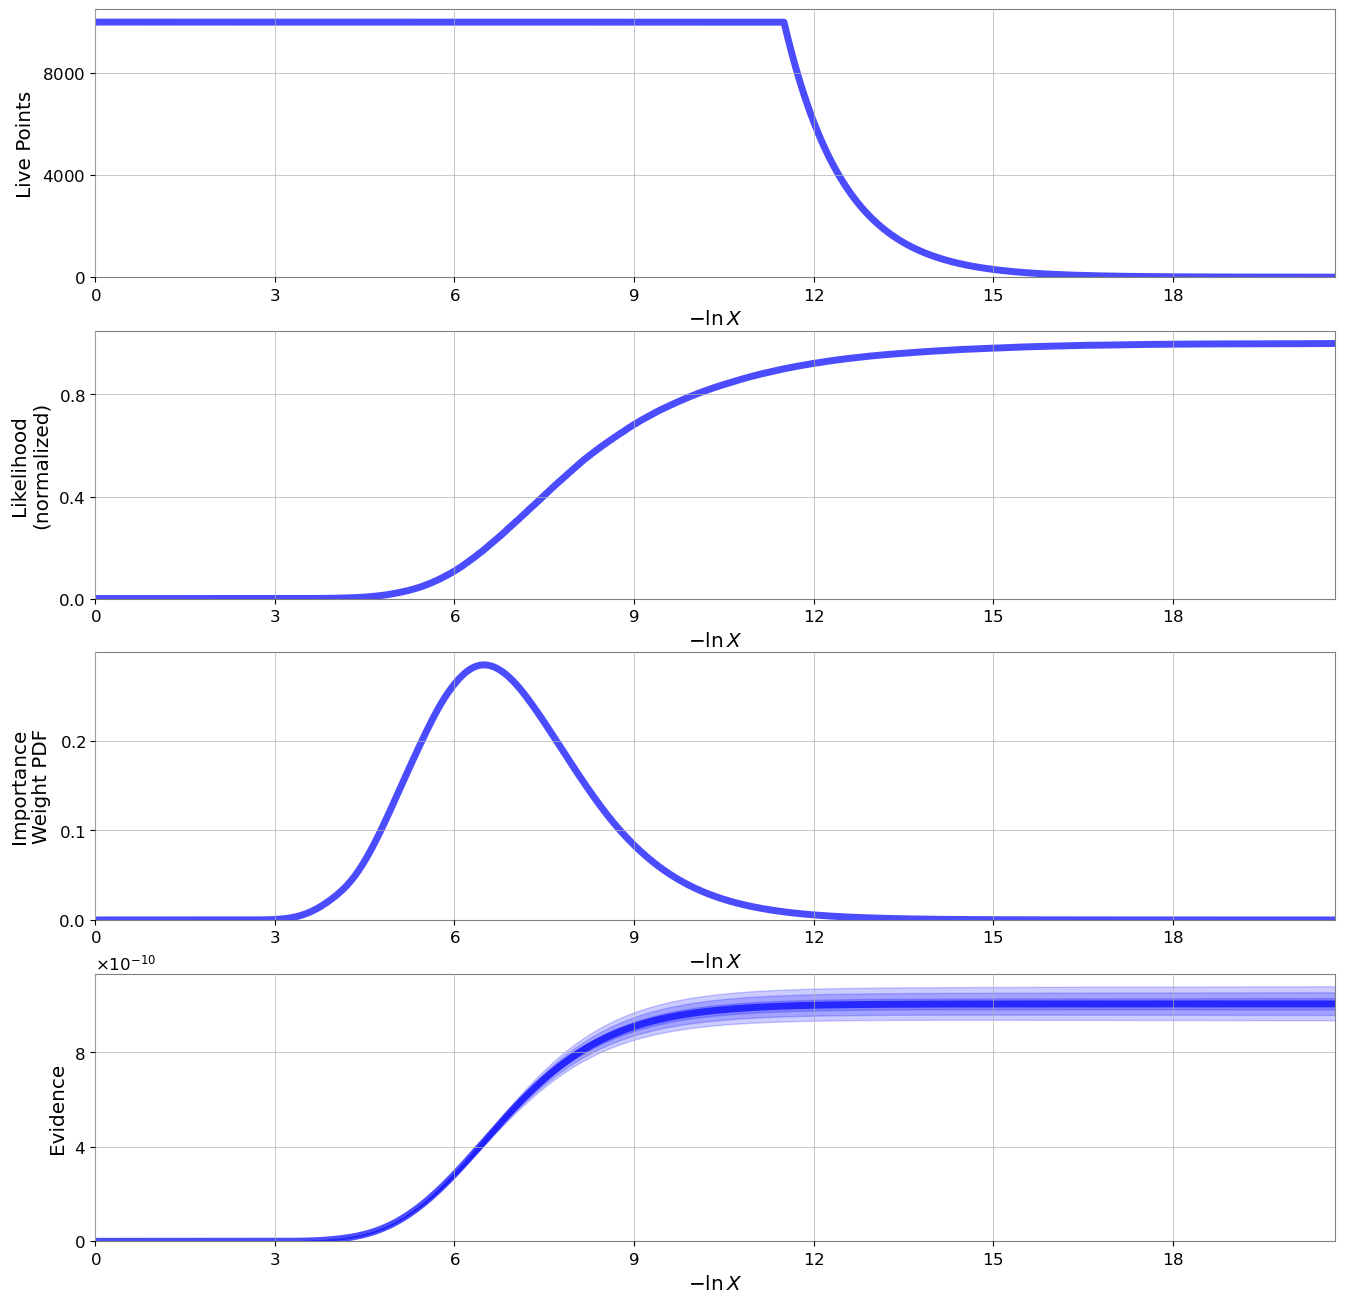

In [144]:
from dynesty import plotting as dyplot

# Plot a summary of the run.
rfig, raxes = dyplot.runplot(res)

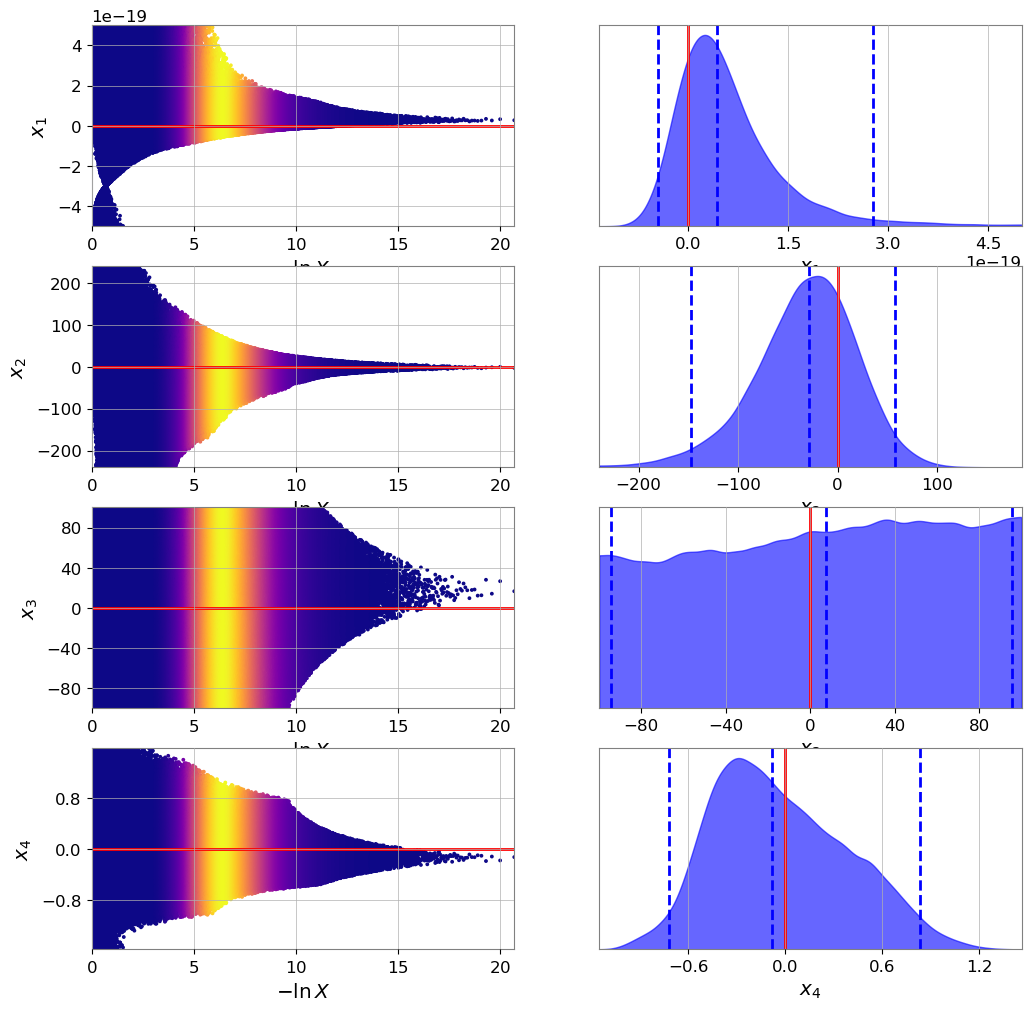

In [145]:
# Plot traces and 1-D marginalized posteriors.
tfig, taxes = dyplot.traceplot(res, truths=[0, 0, 0, 0])

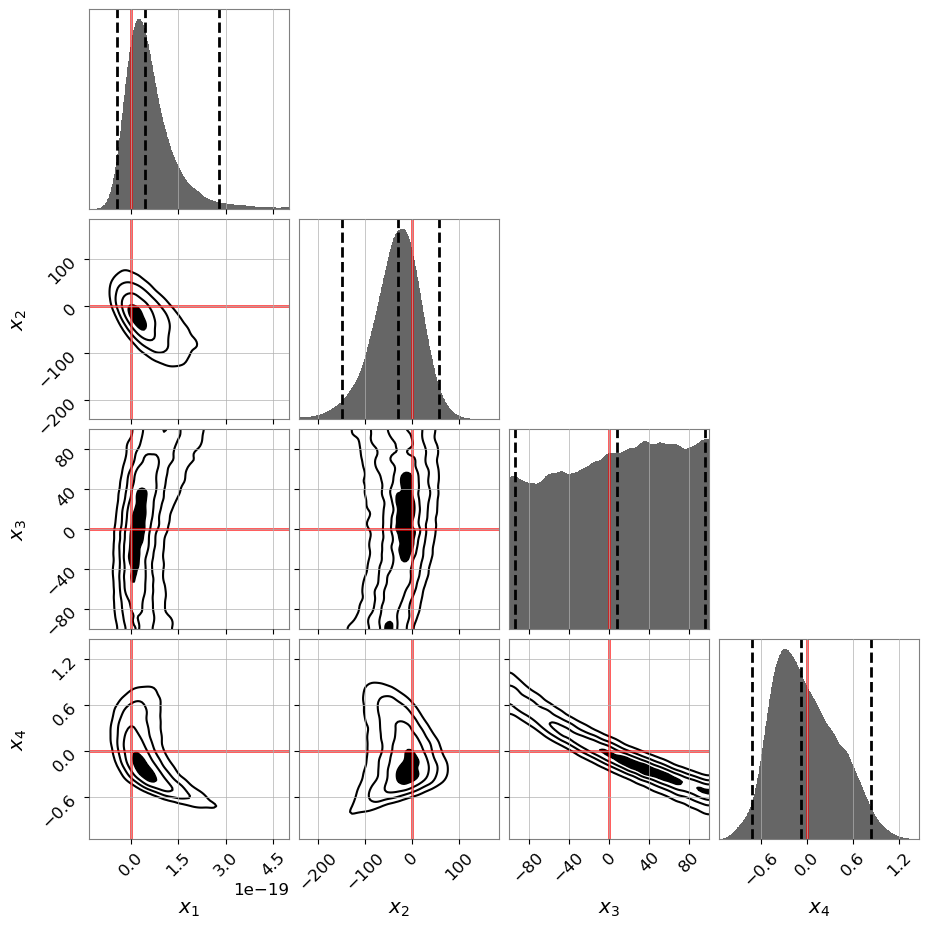

In [146]:
# Plot the 2-D marginalized posteriors.
cfig, caxes = dyplot.cornerplot(res, truths=[0, 0, 0, 0])

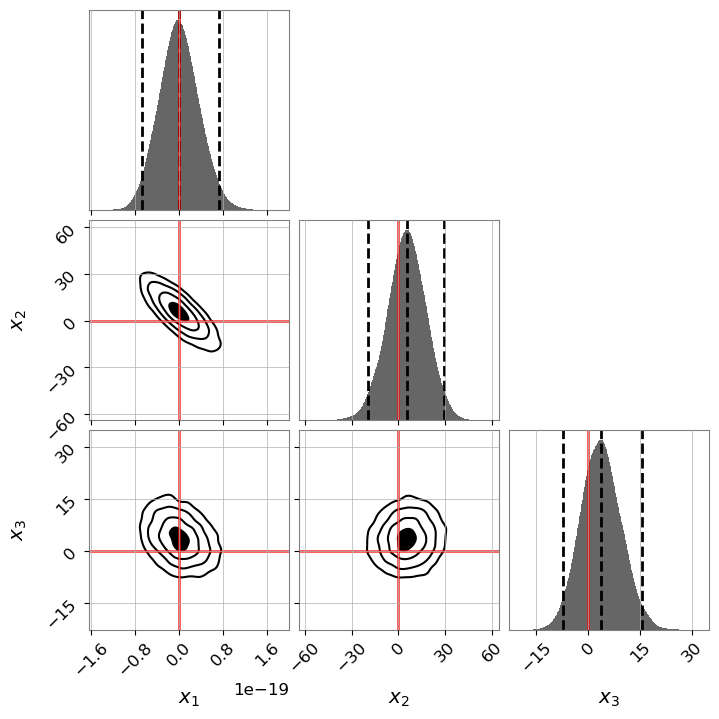

In [130]:
# Plot the 2-D marginalized posteriors.
cfig, caxes = dyplot.cornerplot(res, truths=[0, 0, 0])

In [116]:
omega0, gamma0

(250, 250)

In [131]:
from dynesty import utils as dyfunc

# Extract sampling results.
samples = results.samples  # samples
weights = results.importance_weights()

# Compute 10%-90% quantiles.
quantiles = [dyfunc.quantile(samps, [0.1, 0.9], weights=weights) for samps in samples.T]

# Compute weighted mean and covariance.
mean, cov = dyfunc.mean_and_cov(samples, weights)

# Resample weighted samples.
samples_equal = results.samples_equal()

# Generate a new set of results with sampling uncertainties.
results_sim = dyfunc.resample_run(results)


sigmas = []
for pind in range(ndim):

    sigmas.append(np.sqrt(cov[pind, pind]))

print(mean, " +- ", sigmas)

[6.10300786e-22 5.38461892e+00 3.67118052e+00]  +-  [3.593851242282611e-20, 12.170473570001231, 5.777030733463904]


In [106]:
print(mean, " +- ", sigmas)

[ 1.83693211e-20 -1.08099441e+01 -3.60752247e+00]  +-  [3.7491895615294976e-20, 38.409115848108186, 18.818838000534274]


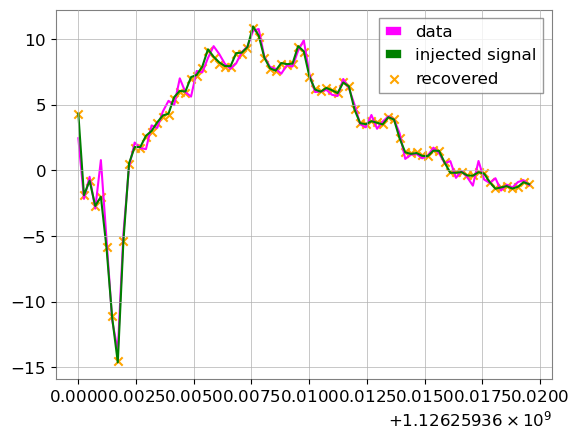

In [121]:
rec_signal_seg = get_damped_sinusoid(
    time_seg, [A0, omega0 + mean[0], gamma0 + mean[1], t0, phi0]
)

plt.plot(time_seg, inv_Lij @ data_seg, label="data", c="magenta")
plt.plot(time_seg, inv_Lij @ signal_seg, label="injected signal", c="green")
plt.scatter(
    time_seg, inv_Lij @ rec_signal_seg, marker="x", c="orange", label="recovered"
)
plt.legend()
plt.show()